# Data Preprocessing and Augmentation

In [2]:
import pandas as pd
from config import *
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from data.augment import augment_data
from data.visualize import plot_samples

2025-02-20 10:50:34.499555: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-20 10:50:34.596162: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-20 10:50:35.298746: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-20 10:50:35.298811: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-20 10:50:35.449284: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

## Exploratory Data Analysis (EDA)

In [161]:
# Load data
data_dir = os.path.join(ROOT_DIR, DATA_RAW_DIR, "no_leak")
all_files = glob.glob(os.path.join(data_dir, "*.csv"))
df_list = [pd.read_csv(file, index_col=0) for file in all_files]
df_no_leak = pd.concat(df_list, ignore_index=True)
df_no_leak['timestamp'] = pd.to_datetime(df_no_leak['timestamp'])
df_no_leak.set_index('timestamp', inplace=True)

data_dir = os.path.join(ROOT_DIR, DATA_RAW_DIR, "leak")
all_files = glob.glob(os.path.join(data_dir, "*.csv"))
df_list = [pd.read_csv(file, index_col=0) for file in all_files]
df_leak = pd.concat(df_list, ignore_index=True)
df_leak['timestamp'] = pd.to_datetime(df_leak['timestamp'])
df_leak.set_index('timestamp', inplace=True)

Text(0.5, 1.0, 'KDE Plot (Anomalous Data)')

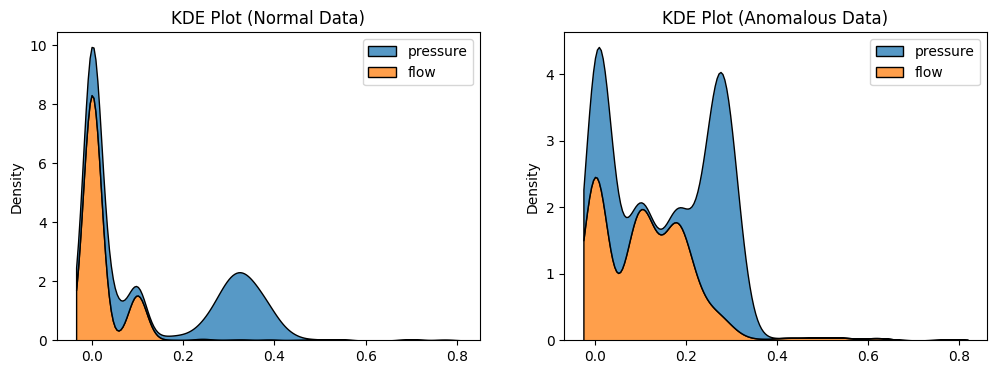

In [162]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.kdeplot(df_no_leak, multiple="stack", cut=True, ax=ax[0])
ax[0].set_title("KDE Plot (Normal Data)")

sns.kdeplot(df_leak, multiple="stack", cut=True, color="", ax=ax[1])
ax[1].set_title("KDE Plot (Anomalous Data)")


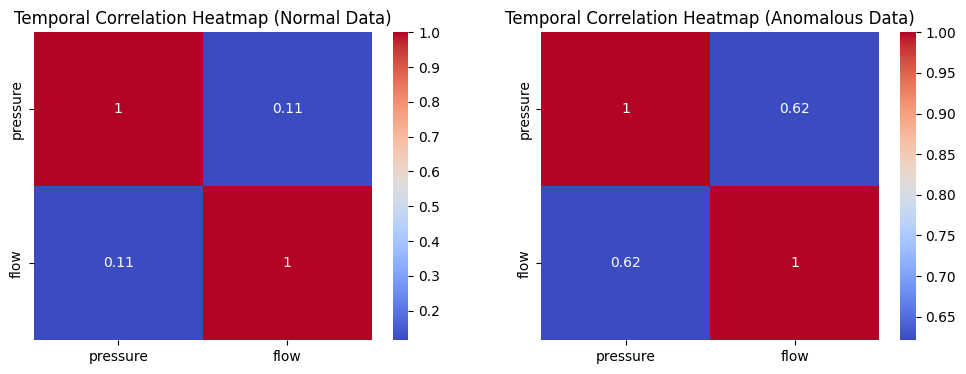

In [163]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.heatmap(df_no_leak.corr(), annot=True, cmap="coolwarm", ax=ax[0])
ax[0].set_title("Temporal Correlation Heatmap (Normal Data)")

sns.heatmap(df_leak.corr(), annot=True, cmap="coolwarm", ax=ax[1])
ax[1].set_title("Temporal Correlation Heatmap (Anomalous Data)")
plt.show()

In [164]:
print("\nSampling Frequency: ", df_leak.index.to_series().diff().median())


Sampling Frequency:  0 days 00:00:01


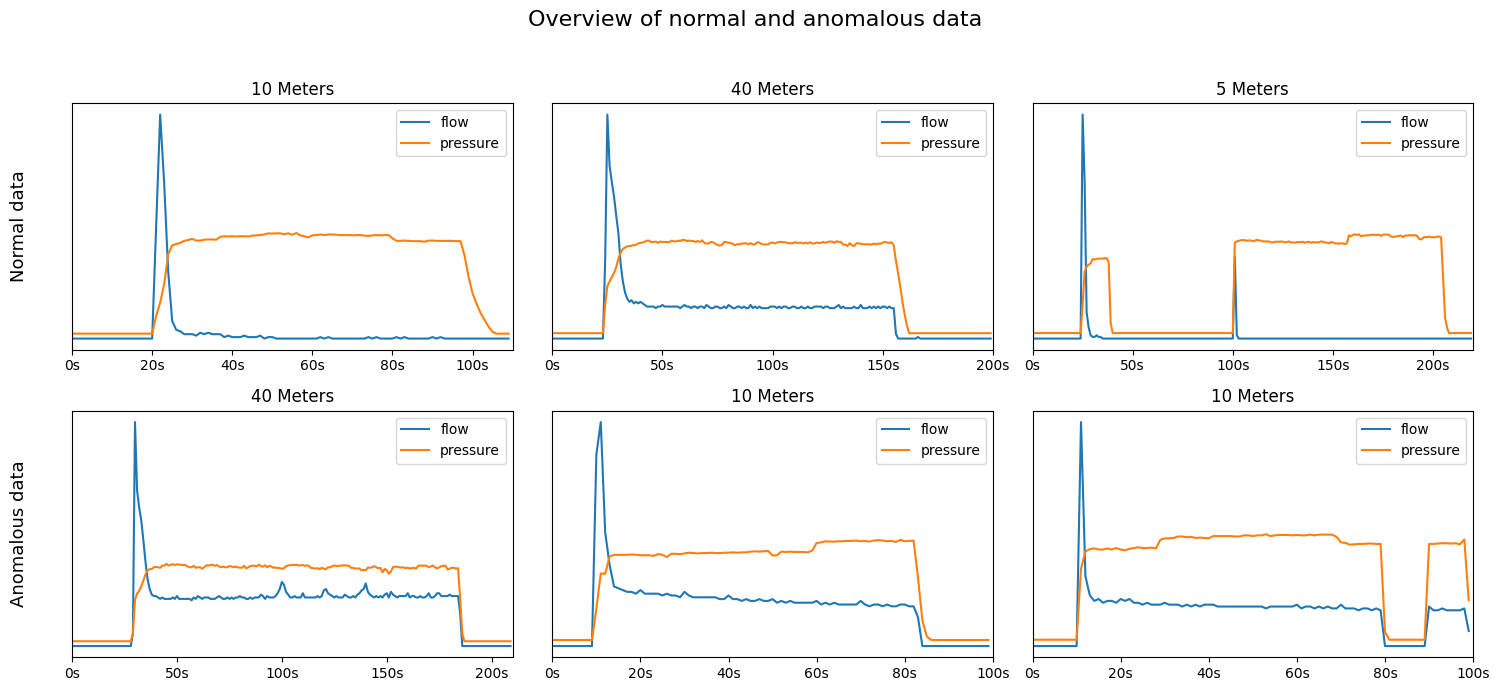

In [27]:
plot_samples(os.path.join(ROOT_DIR, DATA_RAW_DIR))

## Data Augmentation

In [188]:
augment_data(num_augmented=5, variance=3e-5)

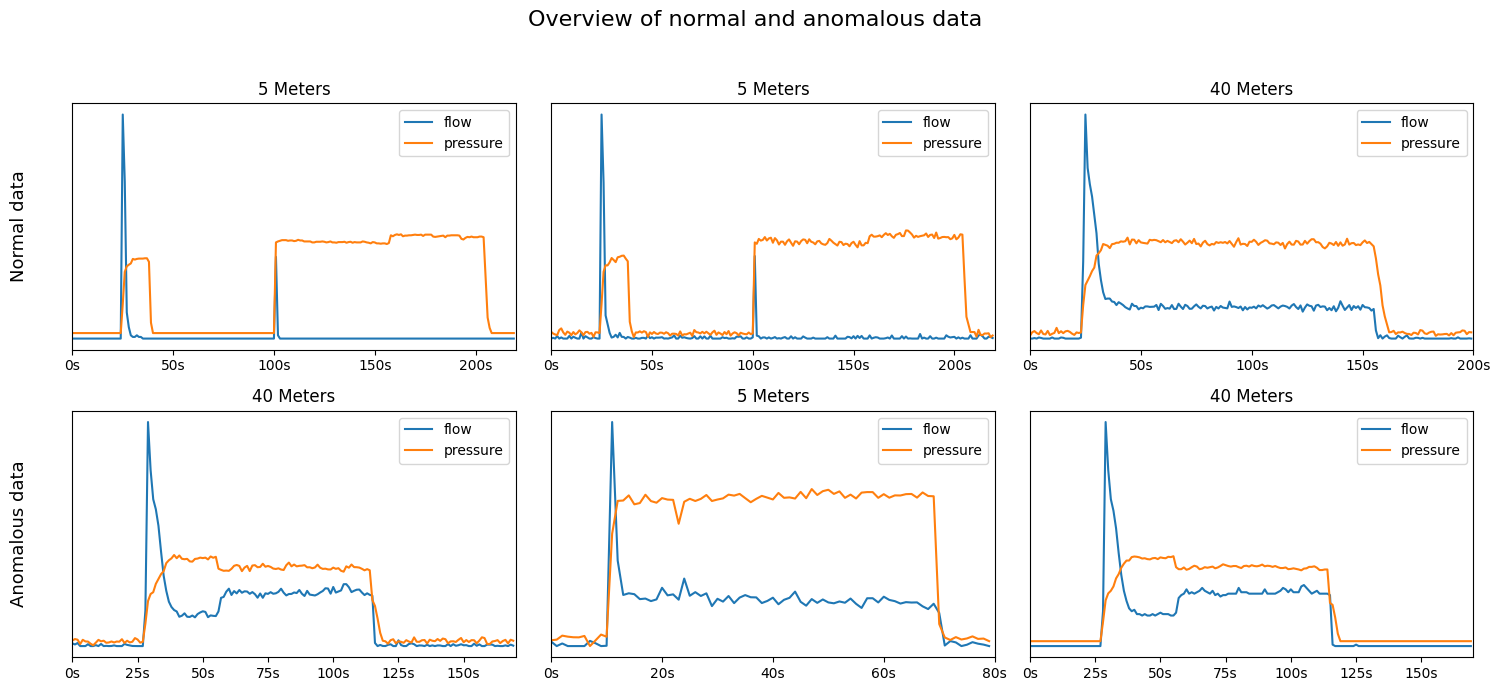

In [28]:
plot_samples(os.path.join(ROOT_DIR, DATA_AUGMENTED_DIR))